Summary Statistics for Numerical Columns:
             rank         year      rating    box_office  budget_yield
count  250.000000   250.000000  250.000000  2.500000e+02    250.000000
mean   125.500000  1986.360000    8.307200  2.067740e+08      7.654760
std     72.312977    25.125356    0.229081  3.653296e+08     14.042708
min      1.000000  1921.000000    8.000000  0.000000e+00      0.000000
25%     63.250000  1966.250000    8.100000  5.375080e+05      0.170000
50%    125.500000  1994.000000    8.200000  4.603973e+07      3.380000
75%    187.750000  2006.000000    8.400000  2.637577e+08      8.737500
max    250.000000  2022.000000    9.300000  2.799439e+09    122.140000

Median values:
rank                 125.50
year                1994.00
rating                 8.20
box_office      46039729.00
budget_yield           3.38
dtype: float64

Mode values:
rank                                                            1
name                                                 12 Angry Men
ye

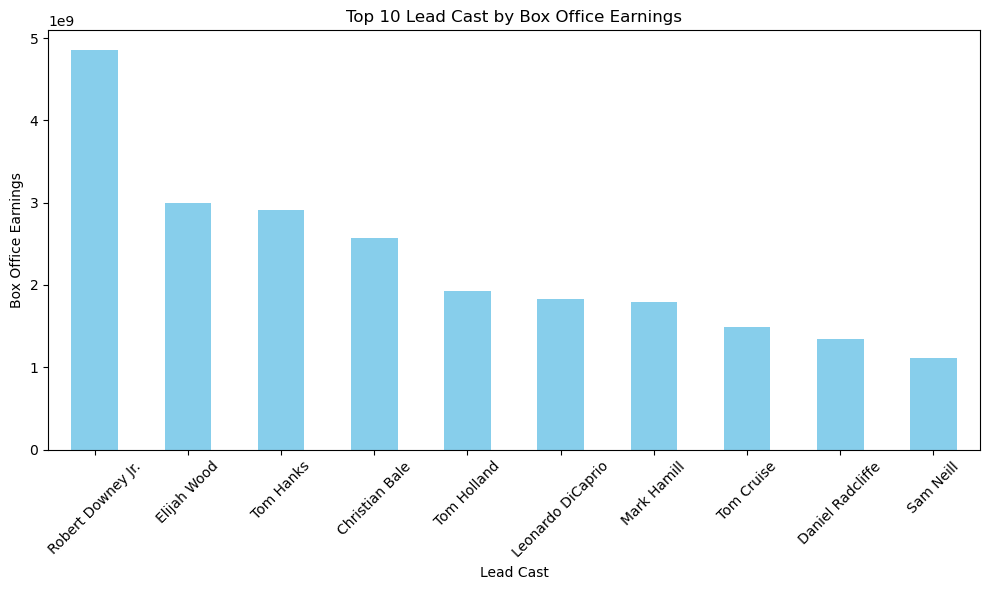

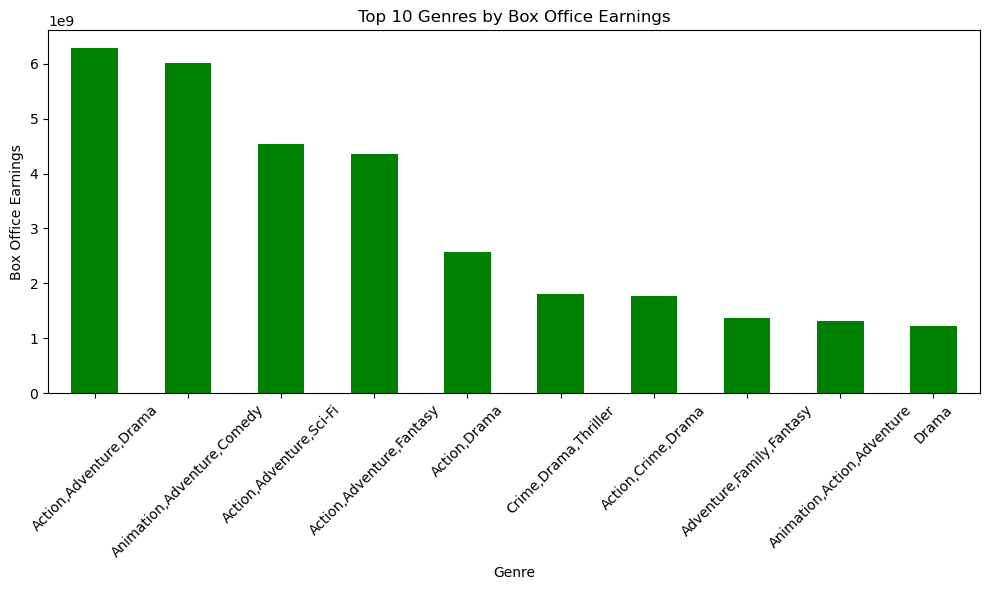

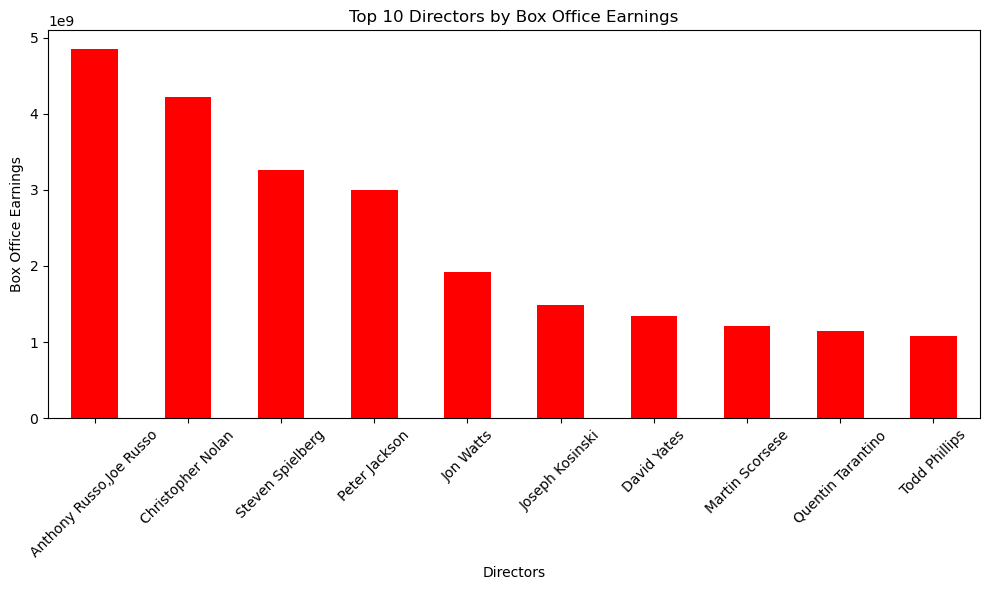

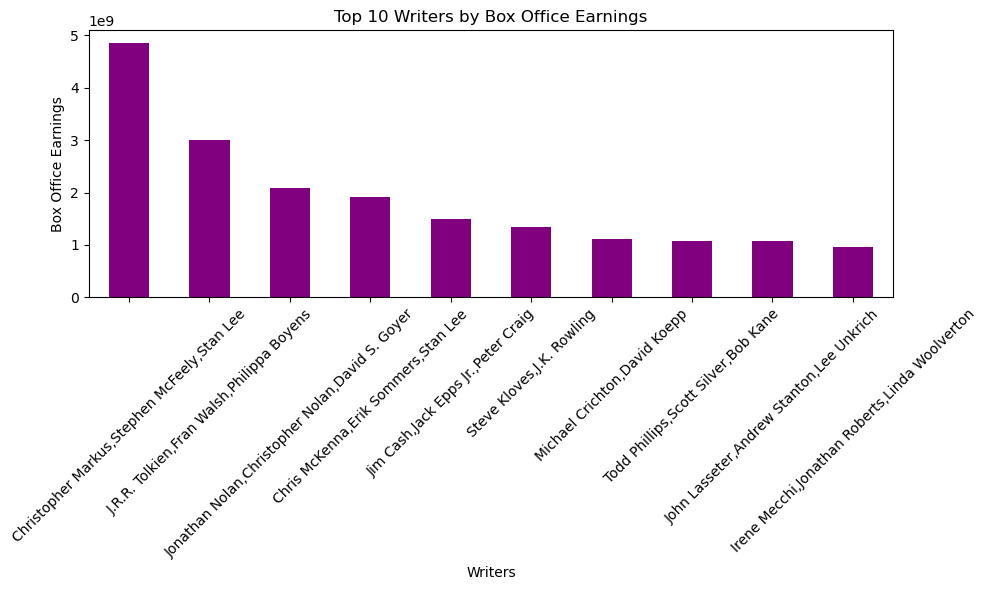

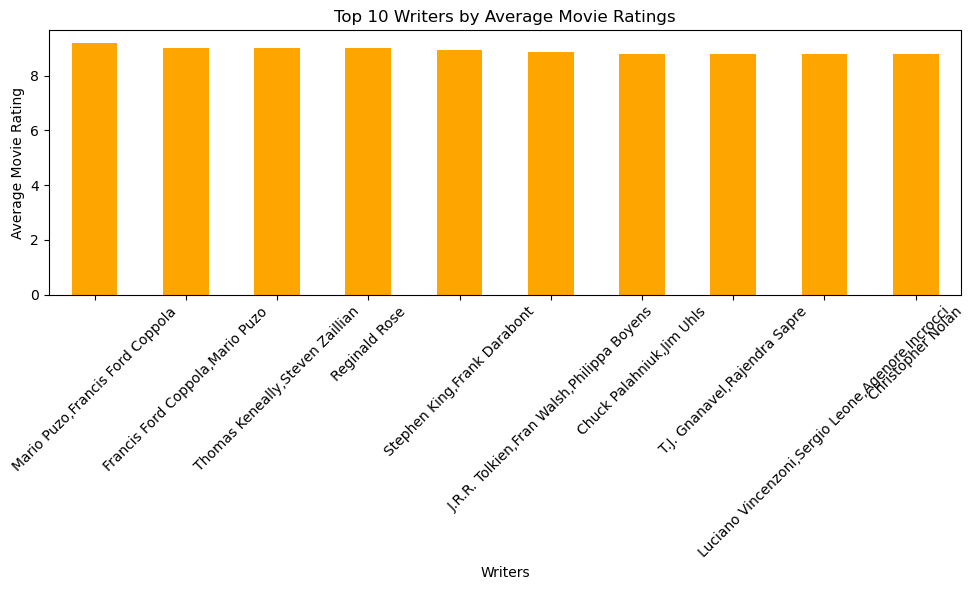

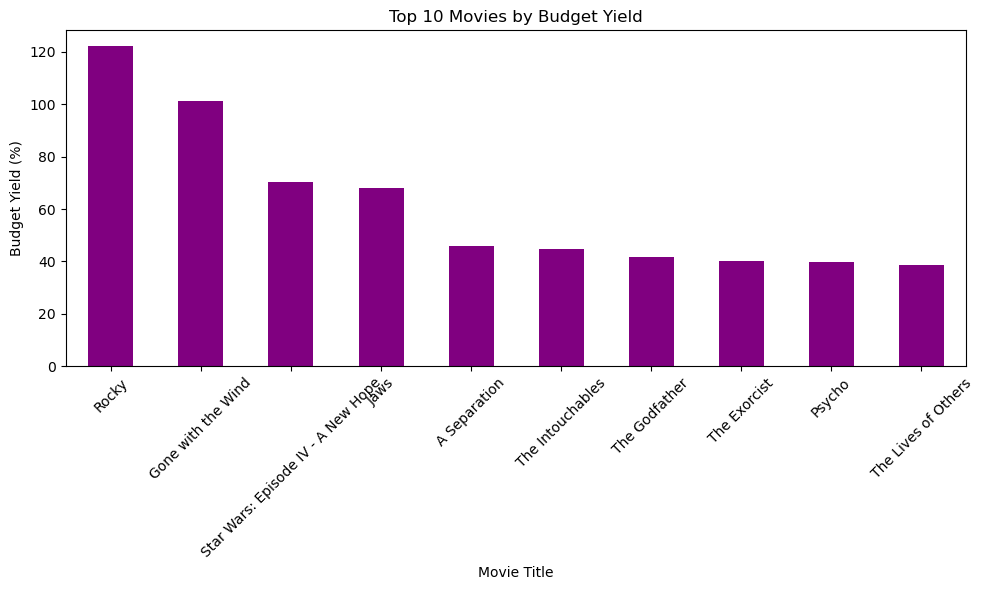

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset with encoding set to 'ISO-8859-1'
file_path = r'C:\Users\Adeyemo Bolanle\Downloads\IMDB Top 250 Movies.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Summary statistics for numerical columns
summary_stats = df.describe()

# Print the summary statistics
print("Summary Statistics for Numerical Columns:")
print(summary_stats)

# Additional statistics (median, mode)
print("\nMedian values:")
print(df.median(numeric_only=True))

print("\nMode values:")
print(df.mode().iloc[0])

# Display total missing values per column
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Check unique values in key categorical columns
print("\nUnique values in key categorical columns:")
print("Genres:", df['genre'].nunique())
print("Directors:", df['directors'].nunique())
print("Writers:", df['writers'].nunique())

# Step 1: Clean the dataset
# Trim the 'casts' column to keep only the first actor (lead actor)
df['Lead Cast'] = df['casts'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else x)

# Convert 'budget' and 'box_office' to numeric values
df['budget'] = pd.to_numeric(df['budget'].replace('[\$,]', '', regex=True), errors='coerce')
df['box_office'] = pd.to_numeric(df['box_office'].replace('[\$,]', '', regex=True), errors='coerce')

# Replace 'Not Available' and any other non-numeric values with NaN
df['budget'] = df['budget'].replace('Not Available', np.nan)
df['box_office'] = df['box_office'].replace('Not Available', np.nan)

# Create the BudgetYield (Earnings as a percentage of the Budget)
df['BudgetYield'] = (df['box_office'] / df['budget']) * 100

# Check the result
print(df[['budget', 'box_office', 'BudgetYield']].head())

# Step 2: Data analysis
# Rank earnings by lead cast
earnings_by_lead_cast = df.groupby('Lead Cast')['box_office'].sum().sort_values(ascending=False)

# Rank directors by earnings
# Ensure there are no missing values in the 'directors' column
df['directors'] = df['directors'].fillna('Unknown')
earnings_by_director = df.groupby('directors')['box_office'].sum().sort_values(ascending=False)

# Compare earnings by genre
earnings_by_genre = df.groupby('genre')['box_office'].sum().sort_values(ascending=False)

# Step 3: Visualization
# Visualization: Earnings by Lead Cast
plt.figure(figsize=(10, 6))
earnings_by_lead_cast.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Lead Cast by Box Office Earnings')
plt.xlabel('Lead Cast')
plt.ylabel('Box Office Earnings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Earnings by Genre
plt.figure(figsize=(10, 6))
earnings_by_genre.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Genres by Box Office Earnings')
plt.xlabel('Genre')
plt.ylabel('Box Office Earnings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Earnings by Director
plt.figure(figsize=(10, 6))
earnings_by_director.head(10).plot(kind='bar', color='red')
plt.title('Top 10 Directors by Box Office Earnings')
plt.xlabel('Directors')
plt.ylabel('Box Office Earnings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Writers by Earnings
earnings_by_writer = df.groupby('writers')['box_office'].sum().sort_values(ascending=False)

# Step 5: Writers by Ratings (Average Rating for each Writer)
ratings_by_writer = df.groupby('writers')['rating'].mean().sort_values(ascending=False)

# Step 6: Visualization for Writers by Earnings
plt.figure(figsize=(10, 6))
earnings_by_writer.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Writers by Box Office Earnings')
plt.xlabel('Writers')
plt.ylabel('Box Office Earnings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 7: Visualization for Writers by Ratings
plt.figure(figsize=(10, 6))
ratings_by_writer.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Writers by Average Movie Ratings')
plt.xlabel('Writers')
plt.ylabel('Average Movie Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Top 10 Movies by Budget Yield
plt.figure(figsize=(10, 6))
df.set_index('name')['budget_yield'].nlargest(10).plot(kind='bar', color='purple')
plt.title('Top 10 Movies by Budget Yield')
plt.xlabel('Movie Title')
plt.ylabel('Budget Yield (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
